In [ ]:
import sqlite3
import polars as pl
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_line, labs, theme, element_text

In [ ]:
# Conectar ao banco de dados SQLite
conn = sqlite3.connect("/content/drive/MyDrive/labsME315/tudo.db")

# Carregar dados e filtrar colunas necessárias
df = pl.read_database("""
    SELECT data, precipitacao_total_diaria, temp_ar_media, temp_max, regiao, codigo_wmo, ano
    FROM result_table
""", conn)

# Fechar a conexão
conn.close()
df

data,precipitacao_total_diaria,temp_ar_media,temp_max,regiao,codigo_wmo,ano
str,f64,f64,f64,str,str,str
"""2000-09-22""",0.0,17.12,21.3,"""S""","""A801""","""2000"""
"""2000-09-23""",1.166667,17.604167,27.2,"""S""","""A801""","""2000"""
"""2000-09-24""",0.991667,14.995833,19.0,"""S""","""A801""","""2000"""
"""2000-09-25""",0.0,10.704167,14.9,"""S""","""A801""","""2000"""
"""2000-09-26""",0.0,11.833333,17.4,"""S""","""A801""","""2000"""
…,…,…,…,…,…,…
"""2024/10/27""",0.0,18.491667,26.9,"""S""","""A884""","""2024"""
"""2024/10/28""",0.0,20.141667,30.5,"""S""","""A884""","""2024"""
"""2024/10/29""",0.0,22.391667,30.7,"""S""","""A884""","""2024"""


In [ ]:

# Ordenar os dados por região, estação e data
df = df.sort(["regiao", "codigo_wmo", "data"])

# 1. Calcular Média Histórica de Temperatura para cada região (usando `temp_ar_media`)
media_temp_regiao = df.group_by("regiao").agg(
    pl.mean("temp_ar_media").alias("media_temp_ar_media")  # Agora estamos usando 'temp_ar_media'
)

# Combinar a média histórica no dataframe principal
df = df.join(media_temp_regiao, on="regiao")


df

data,precipitacao_total_diaria,temp_ar_media,temp_max,regiao,codigo_wmo,ano,dia_seco,dias_secos_15,evento_seca,media_temp_ar_media
str,f64,f64,f64,str,str,str,i32,i32,i32,f64
"""2000-05-07""",0.0,25.125,28.3,"""CO""","""A001""","""2000""",1,null,0,24.364261
"""2000-05-08""",0.0,22.104167,28.2,"""CO""","""A001""","""2000""",1,null,0,24.364261
"""2000-05-09""",0.0,22.041667,28.7,"""CO""","""A001""","""2000""",1,null,0,24.364261
"""2000-05-10""",0.0,22.4625,28.9,"""CO""","""A001""","""2000""",1,null,0,24.364261
"""2000-05-11""",0.0,21.329167,27.3,"""CO""","""A001""","""2000""",1,null,0,24.364261
…,…,…,…,…,…,…,…,…,…,…
"""2024/10/27""",2.9,20.820833,28.7,"""SE""","""F501""","""2024""",0,7,0,22.07513
"""2024/10/28""",2.225,18.579167,21.9,"""SE""","""F501""","""2024""",0,6,0,22.07513
"""2024/10/29""",0.0,18.691667,23.5,"""SE""","""F501""","""2024""",1,6,0,22.07513


In [ ]:
# 2. Identificar Secas: 15 dias seguidos sem precipitação
df = df.with_columns(
    (pl.col("precipitacao_total_diaria") == 0).cast(pl.Int32).alias("dia_seco")
)
df = df.with_columns(
    pl.col("dia_seco").rolling_sum(window_size=15, min_periods=15).over(["regiao", "codigo_wmo"]).alias("dias_secos_15")
)
# Criar a coluna `evento_seca` que marca apenas o início de uma sequência de seca
df = df.with_columns([
    pl.when(
        (pl.col("dias_secos_15") == 15) &  # A sequência de 15 dias secos é atingida
        (pl.col("dias_secos_15").shift(1) < 15)  # O dia anterior não tinha uma sequência completa
    ).then(1).otherwise(0).alias("evento_seca")
])

# 3. Identificar Ondas de Calor: 5 dias seguidos acima da média histórica de temperatura do ar
df = df.with_columns(
    (pl.col("temp_ar_media") > pl.col("media_temp_ar_media")).cast(pl.Int32).alias("dia_calor")
)
df = df.with_columns(
    pl.col("dia_calor").rolling_sum(window_size=5, min_periods=5).over(["regiao", "codigo_wmo"]).alias("dias_calor_5")
)
# Criar a coluna `evento_onda_calor` que marca apenas o início de uma sequência de onda de calor
df = df.with_columns([
    pl.when(
        (pl.col("dias_calor_5") == 5) &  # A sequência de 5 dias de calor é atingida
        (pl.col("dias_calor_5").shift(1) < 5)  # O dia anterior não tinha uma sequência completa
    ).then(1).otherwise(0).alias("evento_onda_calor")
])

df

data,precipitacao_total_diaria,temp_ar_media,temp_max,regiao,codigo_wmo,ano,dia_seco,dias_secos_15,evento_seca,media_temp_ar_media,dia_calor,dias_calor_5,evento_onda_calor
str,f64,f64,f64,str,str,str,i32,i32,i32,f64,i32,i32,i32
"""2000-05-07""",0.0,25.125,28.3,"""CO""","""A001""","""2000""",1,null,0,24.364261,1,null,0
"""2000-05-08""",0.0,22.104167,28.2,"""CO""","""A001""","""2000""",1,null,0,24.364261,0,null,0
"""2000-05-09""",0.0,22.041667,28.7,"""CO""","""A001""","""2000""",1,null,0,24.364261,0,null,0
"""2000-05-10""",0.0,22.4625,28.9,"""CO""","""A001""","""2000""",1,null,0,24.364261,0,null,0
"""2000-05-11""",0.0,21.329167,27.3,"""CO""","""A001""","""2000""",1,null,0,24.364261,0,1,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2024/10/27""",2.9,20.820833,28.7,"""SE""","""F501""","""2024""",0,7,0,22.07513,0,1,0
"""2024/10/28""",2.225,18.579167,21.9,"""SE""","""F501""","""2024""",0,6,0,22.07513,0,1,0
"""2024/10/29""",0.0,18.691667,23.5,"""SE""","""F501""","""2024""",1,6,0,22.07513,0,1,0


In [ ]:
# 4. Contar as estações de coleta únicas por região e ano
estacoes_por_regiao_ano = df.group_by(["ano", "regiao"]).agg(
    pl.n_unique("codigo_wmo").alias("num_estacoes")
)

# 5. Agrupar os eventos e somar por ano e região
df_eventos = df.group_by(["ano", "regiao"]).agg([
    pl.sum("evento_seca").alias("eventos_seca"),
    pl.sum("evento_onda_calor").alias("eventos_onda_calor")
])

# 6. Juntar com a quantidade de estações por região e ano
df_eventos = df_eventos.join(estacoes_por_regiao_ano, on=["ano", "regiao"])

# 7. Normalizar os eventos pela quantidade de estações
df_eventos = df_eventos.with_columns([
    (pl.col("eventos_seca") / pl.col("num_estacoes")).alias("eventos_seca_normalizado"),
    (pl.col("eventos_onda_calor") / pl.col("num_estacoes")).alias("eventos_onda_calor_normalizado")
])

In [ ]:
# 8. Converter o DataFrame Polars para Pandas para o Plotnine
df_eventos_pandas = df_eventos.to_pandas()


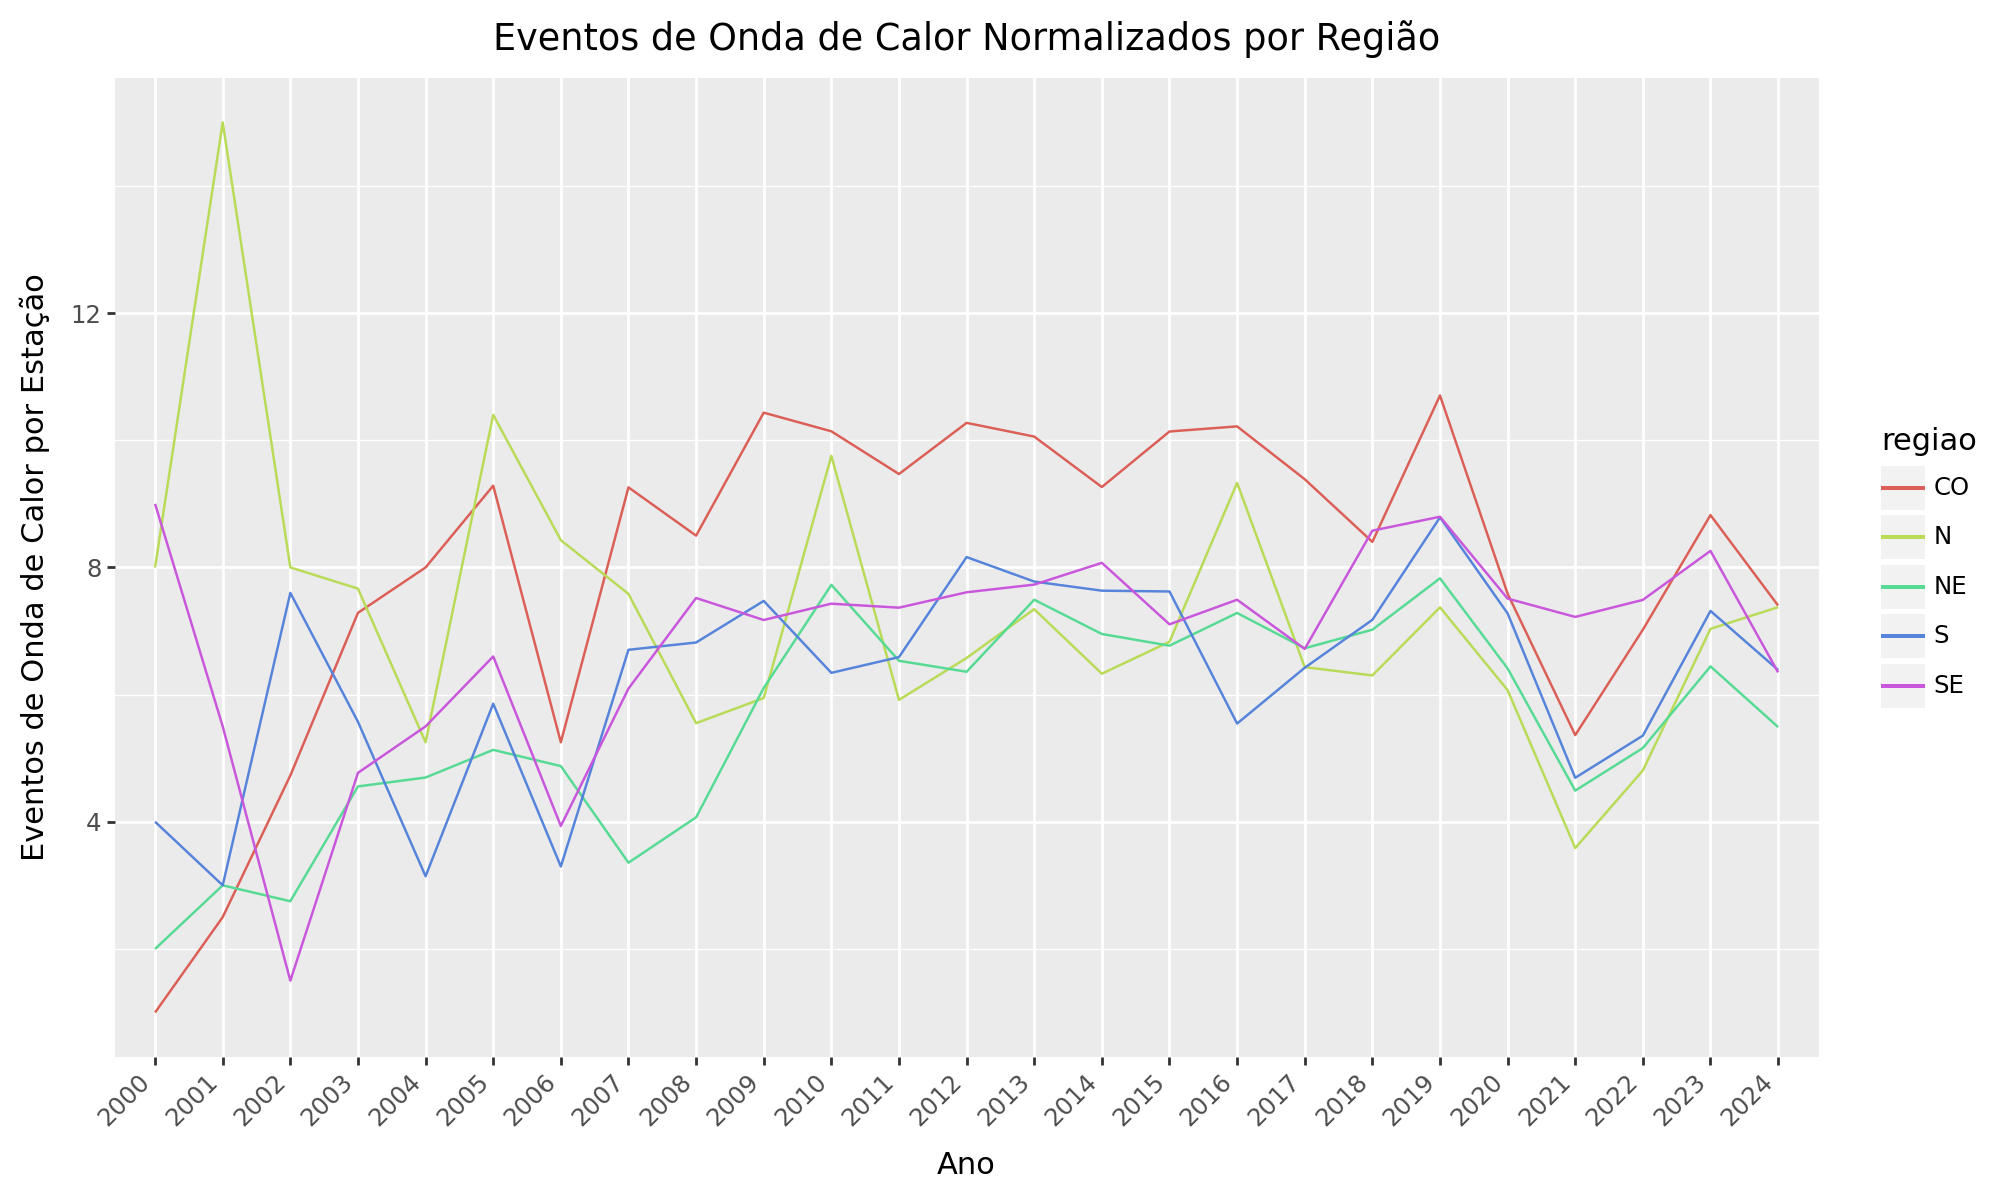

In [ ]:
# Gráfico para eventos de onda de calor normalizados
ggplot(df_eventos_pandas) + \
    geom_line(aes(x='ano', y='eventos_onda_calor_normalizado', color='regiao', group='regiao')) + \
    labs(
        title="Eventos de Onda de Calor Normalizados por Região",
        x="Ano",
        y="Eventos de Onda de Calor por Estação"
    ) + \
    theme(
        axis_text_x=element_text(rotation=45, hjust=1),
        figure_size=(10, 6)
    )

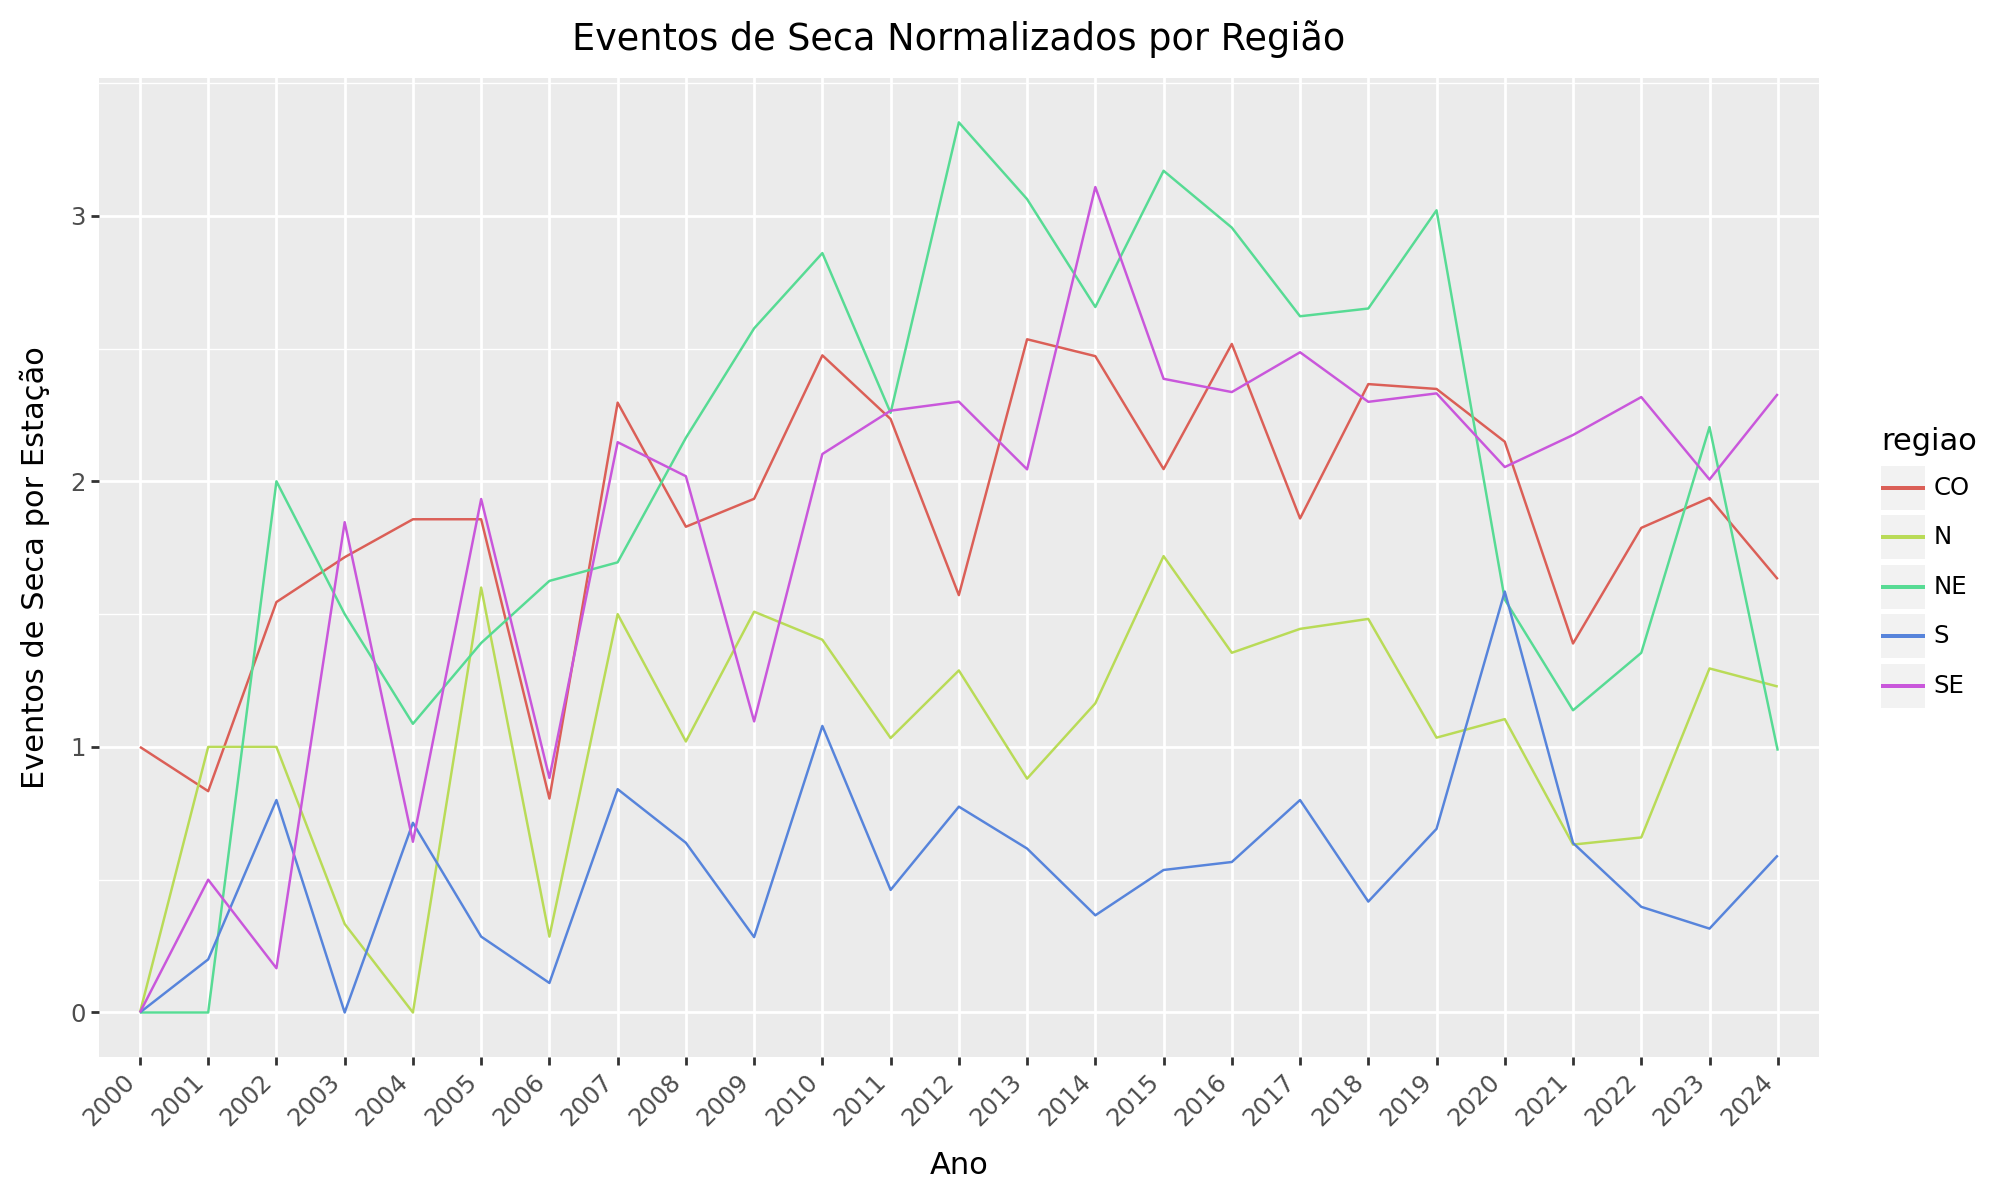

In [ ]:
# Gráfico para eventos de seca normalizados
ggplot(df_eventos_pandas) + \
    geom_line(aes(x='ano', y='eventos_seca_normalizado', color='regiao', group='regiao')) + \
    labs(
        title="Eventos de Seca Normalizados por Região",
        x="Ano",
        y="Eventos de Seca por Estação"
    ) + \
    theme(
        axis_text_x=element_text(rotation=45, hjust=1),
        figure_size=(10, 6)
    )
